### ***``ANOVA, Post-hoc tests, Normality and Homogenity tests on India's Population & COVID-19 datasets``***

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import scipy
import statsmodels as stm

In [2]:
pd.set_option('display.max_rows',50)

In [3]:
state_dly_cases = pd.read_csv("Datasets/covid_19_india.csv")

In [4]:
state_dly_cases.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
8481,8482,16/11/20,8:00 AM,Telengana,-,-,242084,1407,257876
8482,8483,16/11/20,8:00 AM,Tripura,-,-,30555,364,31962
8483,8484,16/11/20,8:00 AM,Uttarakhand,-,-,62543,1107,68215
8484,8485,16/11/20,8:00 AM,Uttar Pradesh,-,-,480965,7372,511304
8485,8486,16/11/20,8:00 AM,West Bengal,-,-,394576,7661,431551


In [5]:
state_ws_test = pd.read_csv("Datasets/StatewiseTestingDetails.csv")

In [6]:
state_ws_test.tail()

,Date,State,TotalSamples,Negative,Positive
7307,2020-11-11,West Bengal,5047335.0,NaN,NaN
7308,2020-11-12,West Bengal,5091700.0,NaN,NaN
7309,2020-11-13,West Bengal,5136012.0,NaN,NaN
7310,2020-11-14,West Bengal,5180139.0,NaN,NaN
7311,2020-11-15,West Bengal,5218797.0,NaN,NaN


In [7]:
state_ws_test.shape

(7312, 5)

In [8]:
india_pop = pd.read_csv("Datasets/population_india_census2011.csv.txt")

In [9]:
india_pop.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [10]:
india_pop.shape

(36, 8)

##### **Merging the State Population and State wise testing dataframes**

In [11]:
np.count_nonzero(state_ws_test['State'].unique())

35

In [12]:
np.count_nonzero(india_pop['State / Union Territory'].unique())

36

In [13]:
set(india_pop['State / Union Territory'].unique()) - set(state_ws_test['State'].unique())

{'Lakshadweep', 'Telengana'}

In [14]:
np.sort(india_pop['State / Union Territory'].unique())

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telengana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [15]:
np.sort(state_ws_test['State'].unique())

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

##### **Here, I found out that ``State wise COVID testing dataset`` has no information about testing carried out in ``Lakshadweep``. And, ``Telangana`` spelling is incorrect in ``Indian Pop dataset``.**

In [16]:
india_pop['State / Union Territory'] = india_pop['State / Union Territory'].apply(lambda state: 'Telangana' if state == 'Telengana' else state)

In [17]:
set(india_pop['State / Union Territory'].unique()) - set(state_ws_test['State'].unique()) 

{'Lakshadweep'}

In [18]:
pop_test_df = pd.merge(left=state_ws_test,right=india_pop,left_on='State',right_on='State / Union Territory',how='outer')

In [19]:
pop_test_df.shape

(7313, 13)

In [20]:
pop_test_df.tail()

,Date,State,TotalSamples,Negative,Positive,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
7308,2020-11-12,West Bengal,5091700.0,NaN,NaN,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
7309,2020-11-13,West Bengal,5136012.0,NaN,NaN,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
7310,2020-11-14,West Bengal,5180139.0,NaN,NaN,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
7311,2020-11-15,West Bengal,5218797.0,NaN,NaN,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
7312,NaN,NaN,NaN,NaN,NaN,36,Lakshadweep,64473,14141,50332,32 km2 (12 sq mi),"2,013/km2 (5,210/sq mi)",946


##### **Getting rid of few features :: ``Sno`` as it is a dummy running sequence number and ``State`` as we already have ``State / Union Territory`` providing the same information.** 

In [21]:
pop_test_df.drop(labels=['Sno','State'],axis=1,inplace=True)

##### **Renaming ``State / Union Territory`` as ``State``.**

In [22]:
pop_test_df.rename(columns={'State / Union Territory':'State'},inplace=True)

In [23]:
pd.concat([pop_test_df.head(3),pop_test_df.tail(3)],axis=0)

,Date,TotalSamples,Negative,Positive,State,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,2020-04-17,1403.0,1210,12.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876
1,2020-04-24,2679.0,NaN,27.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876
2,2020-04-27,2848.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876
7310,2020-11-14,5180139.0,NaN,NaN,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
7311,2020-11-15,5218797.0,NaN,NaN,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
7312,NaN,NaN,NaN,NaN,Lakshadweep,64473,14141,50332,32 km2 (12 sq mi),"2,013/km2 (5,210/sq mi)",946


In [24]:
pop_test_df['Density in km2'] = pop_test_df['Density'].apply(lambda row : np.float(row.split('/')[0].replace(",",'')))

In [25]:
pd.concat([pop_test_df.head(3),pop_test_df.tail(3)],axis=0)

,Date,TotalSamples,Negative,Positive,State,Population,Rural population,Urban population,Area,Density,Gender Ratio,Density in km2
0,2020-04-17,1403.0,1210,12.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0
1,2020-04-24,2679.0,NaN,27.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0
2,2020-04-27,2848.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0
7310,2020-11-14,5180139.0,NaN,NaN,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,1029.0
7311,2020-11-15,5218797.0,NaN,NaN,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,1029.0
7312,NaN,NaN,NaN,NaN,Lakshadweep,64473,14141,50332,32 km2 (12 sq mi),"2,013/km2 (5,210/sq mi)",946,2013.0


In [26]:
state_density_df = pop_test_df.groupby(['State'])[['Density in km2']].max().reset_index()

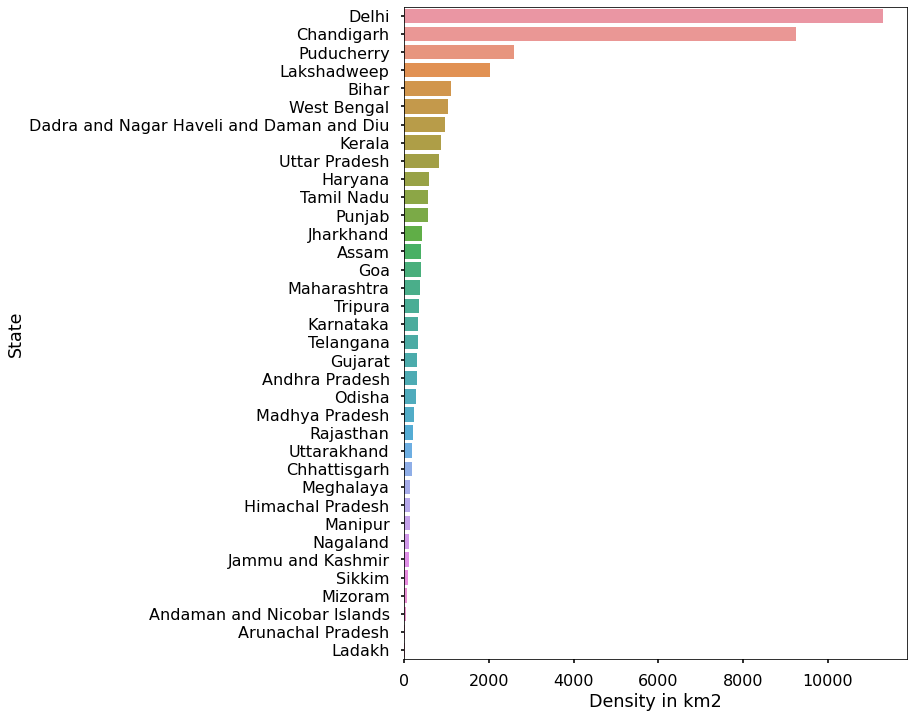

In [27]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(9,12))
    sns.barplot(data=state_density_df.sort_values(by='Density in km2',ascending=False),y='State',x='Density in km2',orient='h');

##### **``'Delhi'`` and ``'Chandigarh'`` totally stands out in this plot with the highest densities values.**

In [28]:
def dense_groups(density=0):
    """
    Description: This function defines the density group based on the state's density value.
    Input: It accepts only one parameter -- density (by default its 0)
    Return: Returns the density group name.
    """
    try:
        if 0<density<=300:
            grp_name = 'Dense1'
        elif 300<density<=600:
            grp_name = 'Dense2' 
        elif 600<density<=900:
            grp_name = 'Dense3'
        elif 900<density<=1200:
            grp_name = 'Dense4'
        else:
            grp_name = 'Dense5'
    except ValueError as err:
        pass
    return grp_name

In [29]:
pop_test_df['Dense_grp'] = list(map(dense_groups,pop_test_df['Density in km2']))

In [30]:
pop_test_df.head()

,Date,TotalSamples,Negative,Positive,State,Population,Rural population,Urban population,Area,Density,Gender Ratio,Density in km2,Dense_grp
0,2020-04-17,1403.0,1210,12.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
1,2020-04-24,2679.0,NaN,27.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
2,2020-04-27,2848.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
3,2020-05-01,3754.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
4,2020-05-16,6677.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1


In [31]:
state_ws_nulls_in_pos = pop_test_df[pop_test_df['Positive'].isna()].groupby(['State'])[['State']].count().rename(columns={'State':'Nulls_in_pos'}).reset_index()

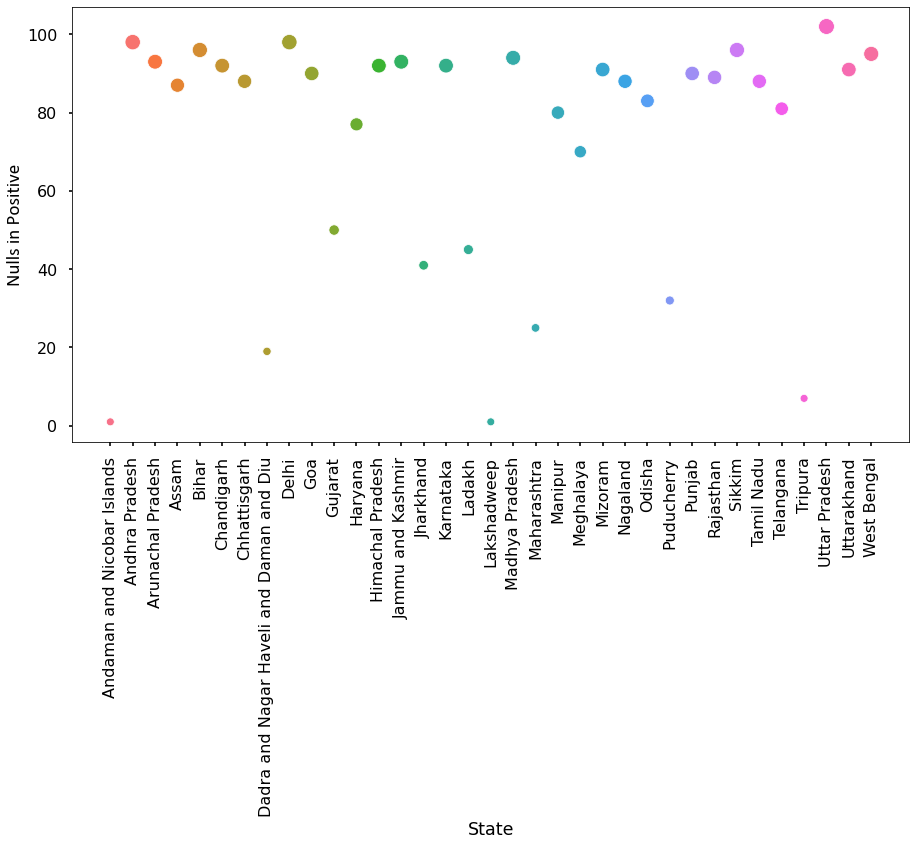

In [32]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(15,8))
    sns.scatterplot(data=state_ws_nulls_in_pos,x='State',y='Nulls_in_pos',size=((state_ws_nulls_in_pos['Nulls_in_pos']*.1)**2),hue='State',legend=False)
    plt.xticks(rotation=90)
    plt.ylabel("Nulls in Positive", fontdict={'size':19,'family':'calibri','style':'normal'})

##### **Here, we came to know that majority of the states have same number of NULLS in the positive cases.**

In [33]:
pop_test_df.head()

,Date,TotalSamples,Negative,Positive,State,Population,Rural population,Urban population,Area,Density,Gender Ratio,Density in km2,Dense_grp
0,2020-04-17,1403.0,1210,12.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
1,2020-04-24,2679.0,NaN,27.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
2,2020-04-27,2848.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
3,2020-05-01,3754.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
4,2020-05-16,6677.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1


In [34]:
def font_dicts(kind=['xlabel','ylabel','title']):
    """
    Description: This function is created for defining the font dictionaries of labels and titles for plots.
    
    Input parameters: It accepts only one below agrument:
            1. kind : Can take one of values --> ['xlabel','ylabel','title']
    
    Retuns: fdict with values of 'size', 'family' and 'color'
    """
    try:
        if kind == 'xlabel':
            fdict = {'size':16,'family':'calibri','style':'oblique','color':'blue'}
        elif kind == 'ylabel':
            fdict = {'size':16,'family':'calibri','style':'oblique','color':'k'}
        elif kind == 'title':
            fdict = {'size':17,'family':'calibri','style':'oblique','color':'brown'}
        else:
            fdict = {'size':16,'family':'calibri','style':'oblique','color':'k'}
    except ValueError as err:
        pass
    return fdict

In [35]:
def plot_hist_kde(d_frame,grp_by_col,dist_col,title=None):
    """
    Description: This function plot the distribution of data
    
    Input Parameters: It accepts below arguments:
            1. d_frame : Dataset of type pandas dataframe
            2. grp_by_col : Column for grouping the data of several states
            3. dist_col : Column whose data distribution to be visualized
            4. title : Title of the plot
    
    Return: None
    """
    all_states = d_frame[grp_by_col].unique()
    with plt.style.context('seaborn-poster'):
        for state in all_states:
            plt.figure(figsize=(8,5))
            d_frame[d_frame[grp_by_col] == state][dist_col].plot(kind='hist',density=True,color='lightblue')
            sns.kdeplot(data=d_frame[d_frame[grp_by_col] == state][dist_col],color='coral',legend=False)
            plt.axvline(d_frame[d_frame[grp_by_col] == state][dist_col].mean(),linestyle='--',color='purple')
            plt.axvline(d_frame[d_frame[grp_by_col] == state][dist_col].median(),linestyle=':',color='black')
            plt.title(title,fontdict=font_dicts(kind='title'))
            plt.xlabel(state,fontdict=font_dicts(kind='xlabel'))
            plt.ylabel('Frequency',fontdict=font_dicts(kind='ylabel'))
            plt.xticks(size=13)
            plt.yticks(size=13)
            plt.legend(("Kde","Mean","Median"))

c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


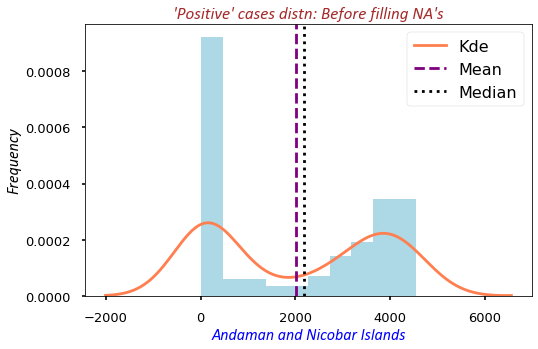

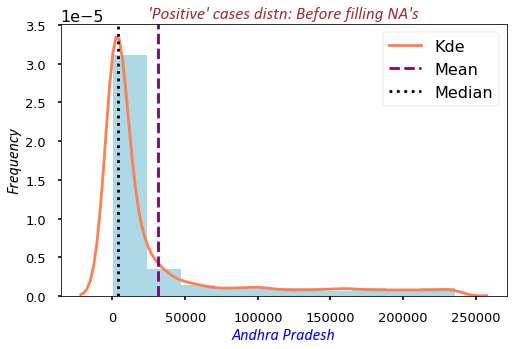

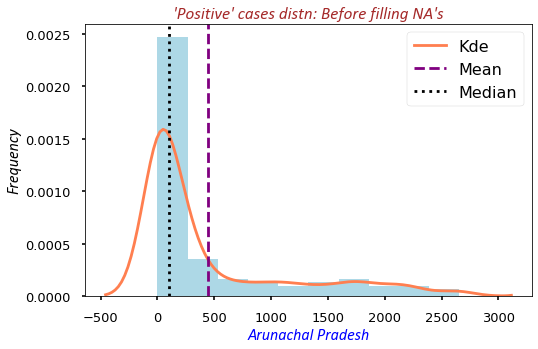

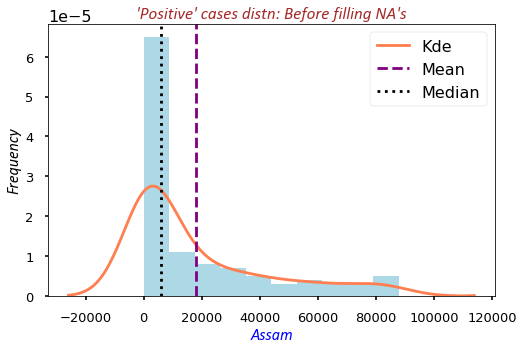

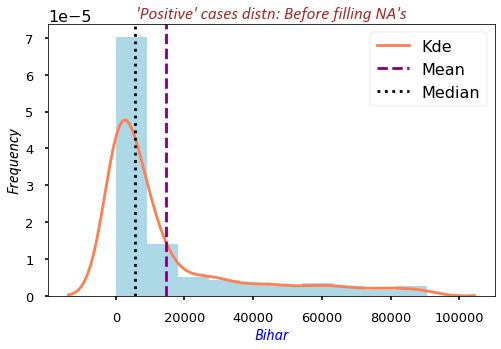

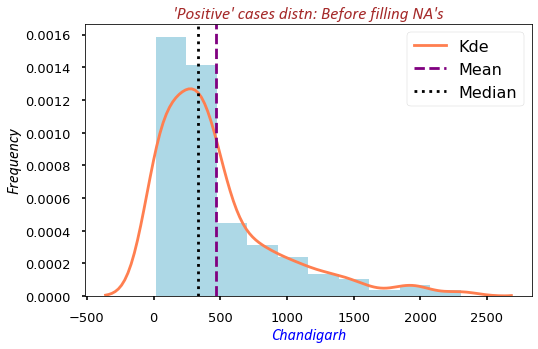

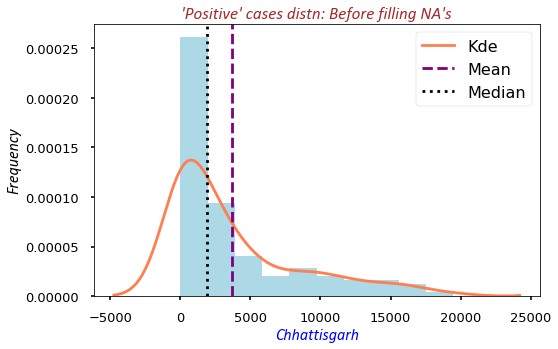

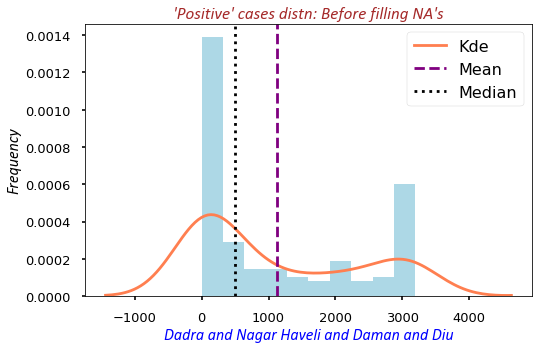

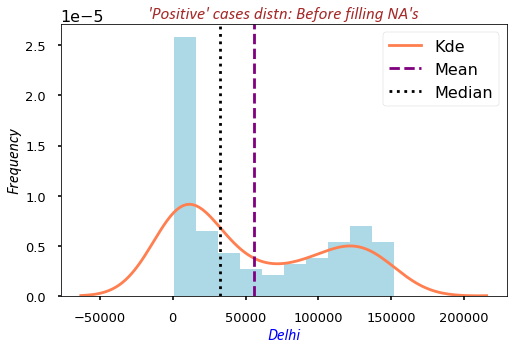

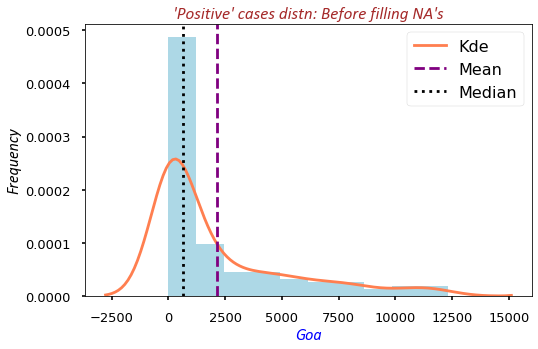

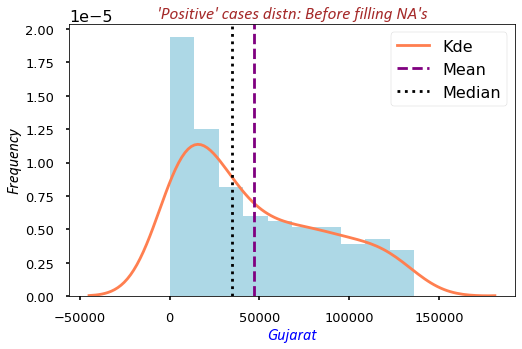

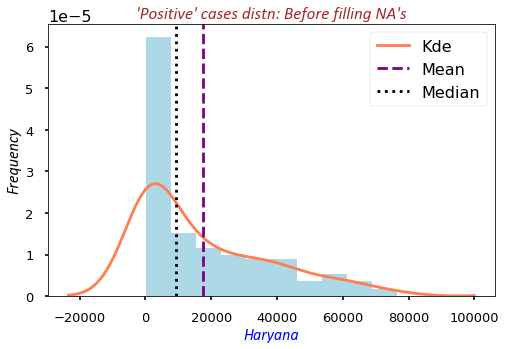

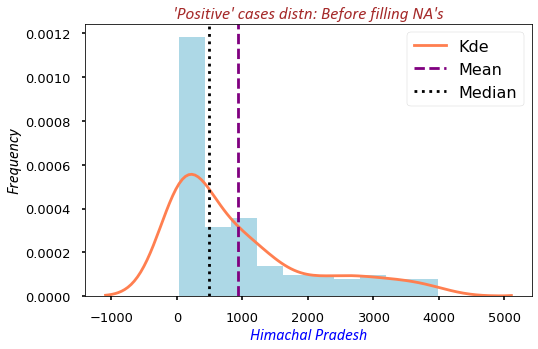

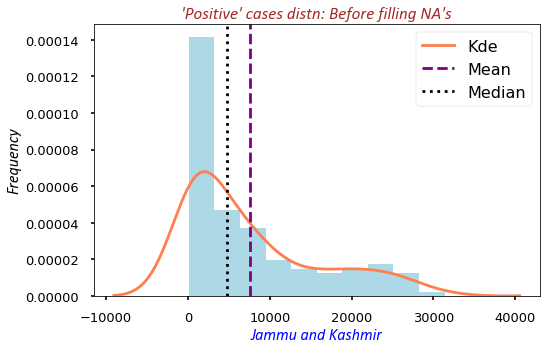

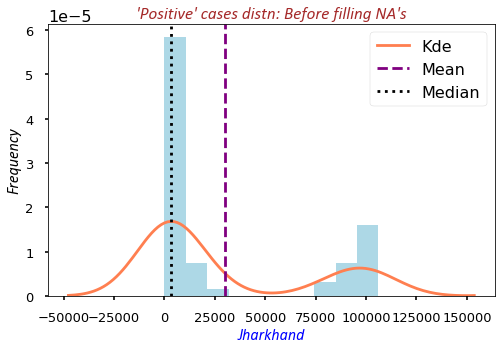

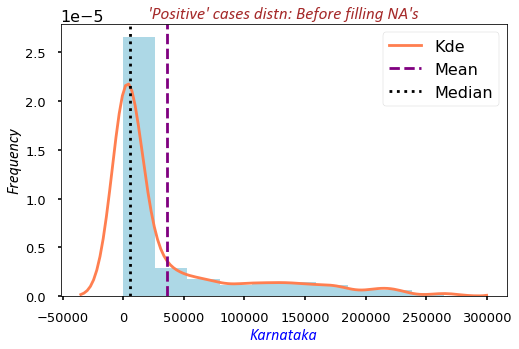

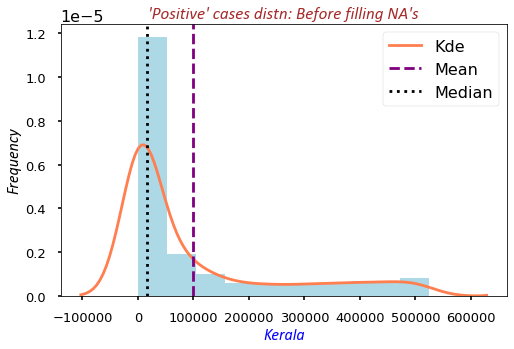

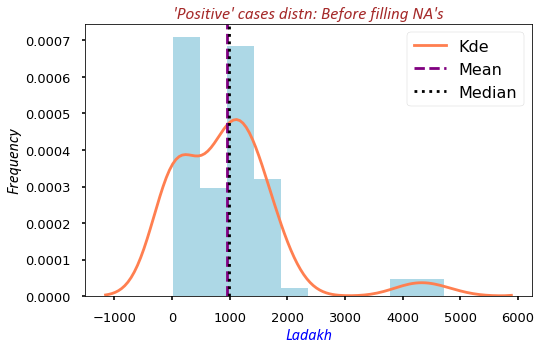

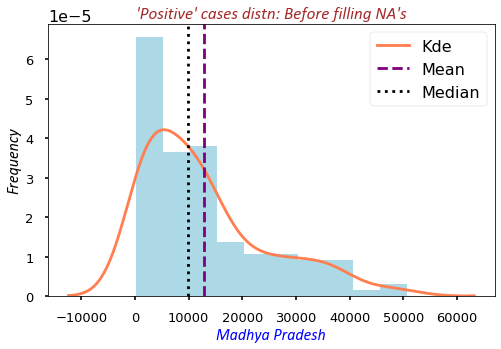

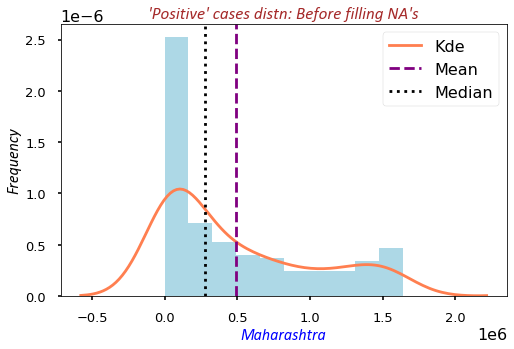

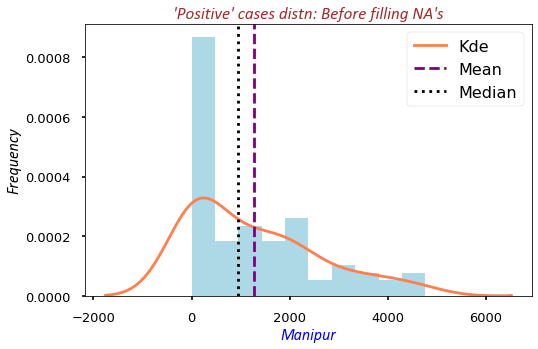

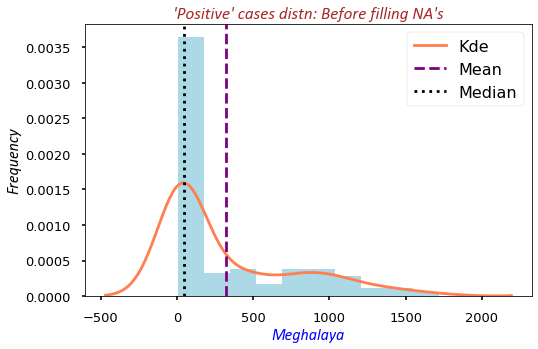

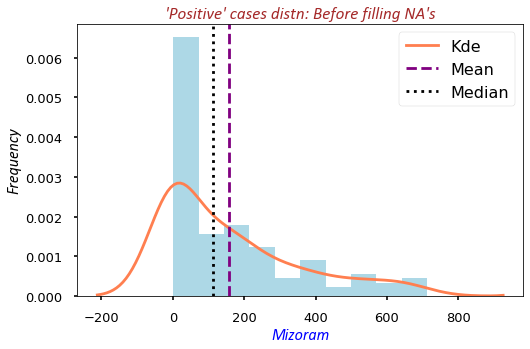

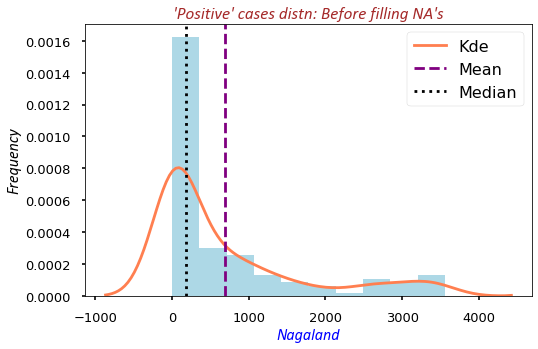

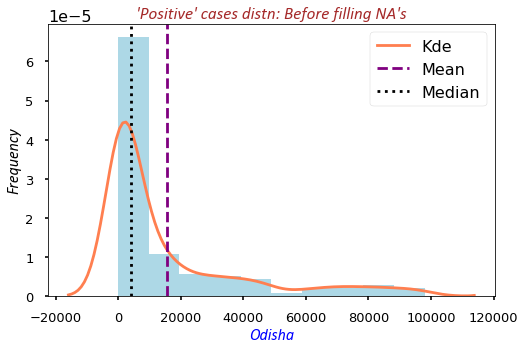

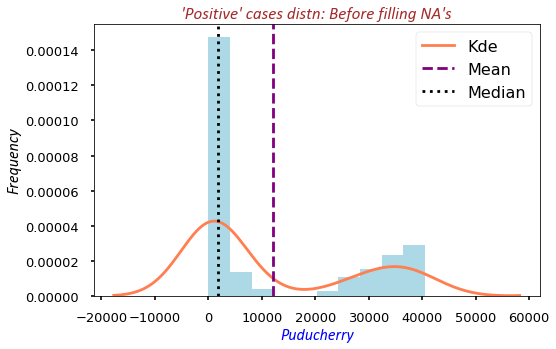

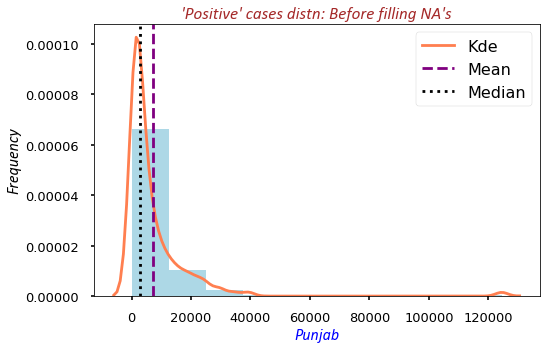

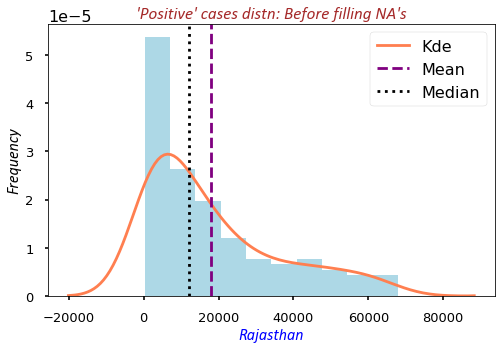

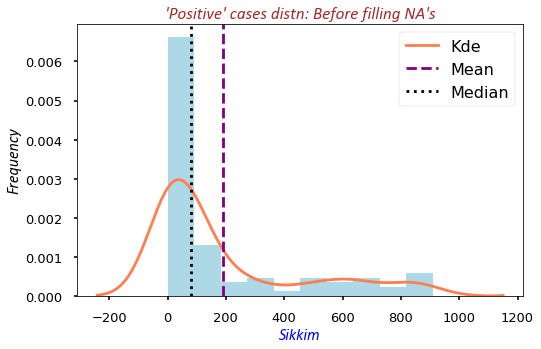

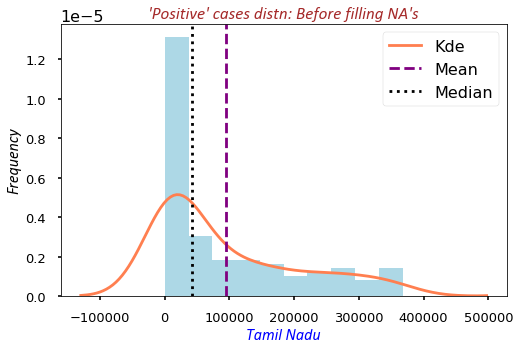

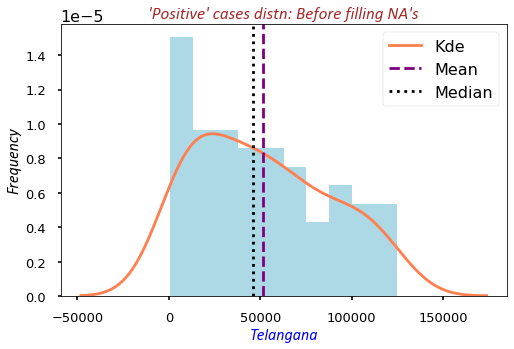

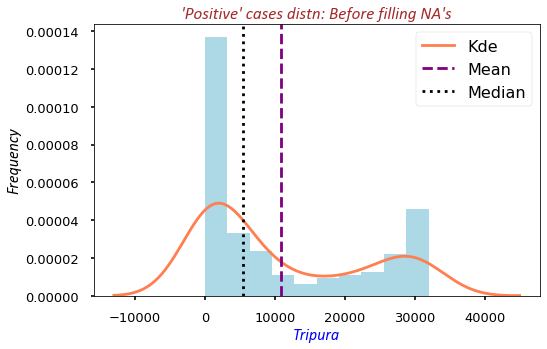

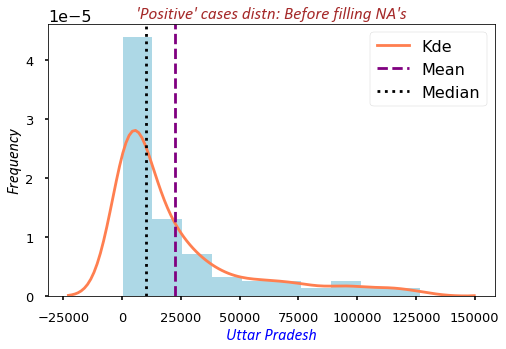

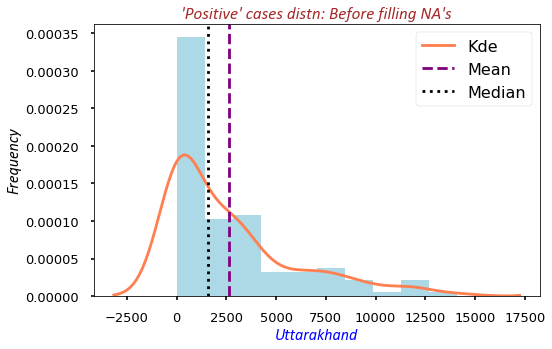

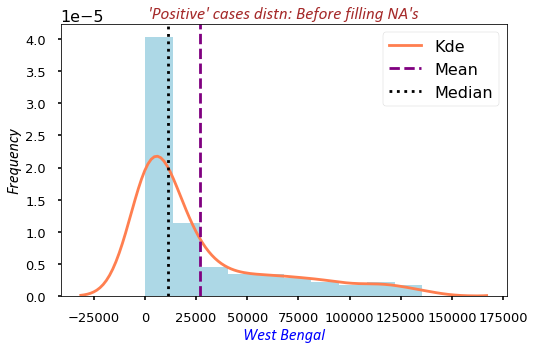

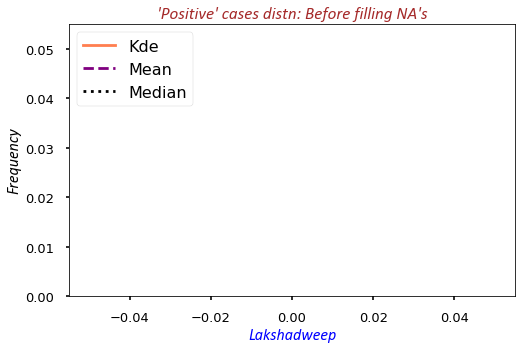

In [36]:
plot_hist_kde(pop_test_df,grp_by_col='State',dist_col='Positive',title="'Positive' cases distn: Before filling NA's")

##### **Imputing NULL values in 'Positive' statewise**
- **``By seeing the above distributions it seems like Median would be more suitable for replacing the NULL values``**

In [37]:
states_pop_median = pop_test_df.groupby(['State'])[['Positive']].median().reset_index().rename(columns={'Positive':'Pos_Median'})

In [38]:
states_pop_median['Pos_Median'].fillna(value=states_pop_median['Pos_Median'].median(),inplace=True)

In [39]:
states_pop_median

,State,Pos_Median
0,Andaman and Nicobar Islands,2186.0
1,Andhra Pradesh,4126.0
2,Arunachal Pradesh,101.0
3,Assam,6067.5
4,Bihar,5695.0
5,Chandigarh,334.0
6,Chhattisgarh,1905.0
7,Dadra and Nagar Haveli and Daman and Diu,495.0
8,Delhi,32810.0
9,Goa,629.0


In [40]:
pop_test_df['Positive'] = pop_test_df[['State','Positive']].apply(lambda row: np.float(states_pop_median[states_pop_median['State'] == row['State']]['Pos_Median']) \
                                        if str(row['Positive']).lower() == str('NaN').lower() else row['Positive'],axis=1)

In [41]:
pop_test_df

,Date,TotalSamples,Negative,Positive,State,Population,Rural population,Urban population,Area,Density,Gender Ratio,Density in km2,Dense_grp
0,2020-04-17,1403.0,1210,12.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
1,2020-04-24,2679.0,NaN,27.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
2,2020-04-27,2848.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
3,2020-05-01,3754.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
4,2020-05-16,6677.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7308,2020-11-12,5091700.0,NaN,11290.5,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,1029.0,Dense4
7309,2020-11-13,5136012.0,NaN,11290.5,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,1029.0,Dense4
7310,2020-11-14,5180139.0,NaN,11290.5,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,1029.0,Dense4
7311,2020-11-15,5218797.0,NaN,11290.5,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,1029.0,Dense4


c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


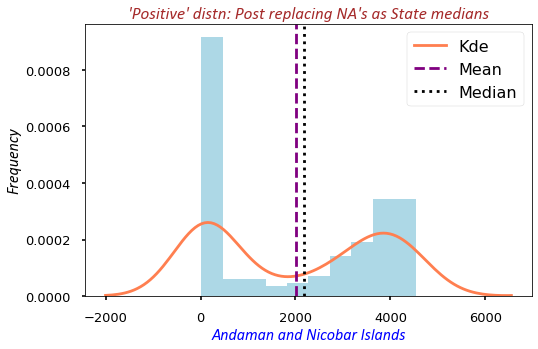

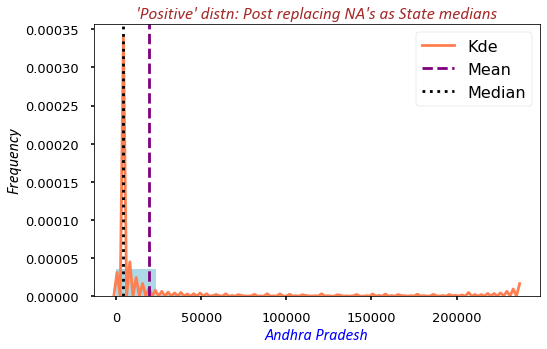

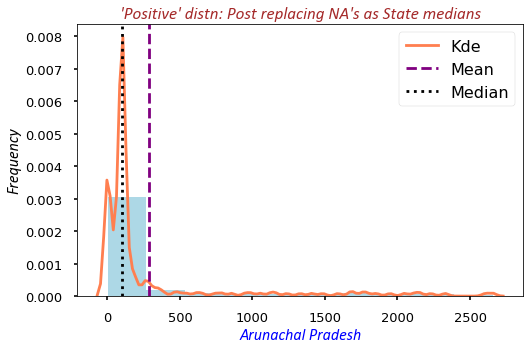

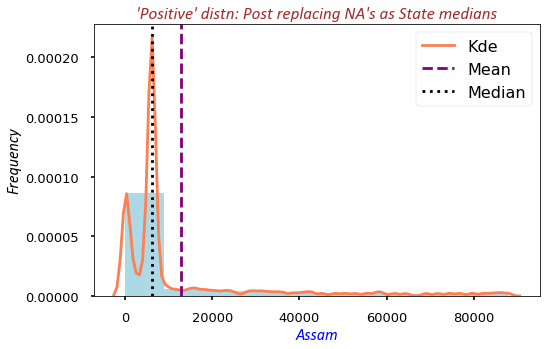

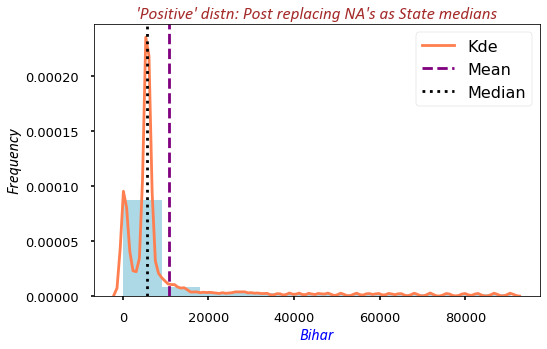

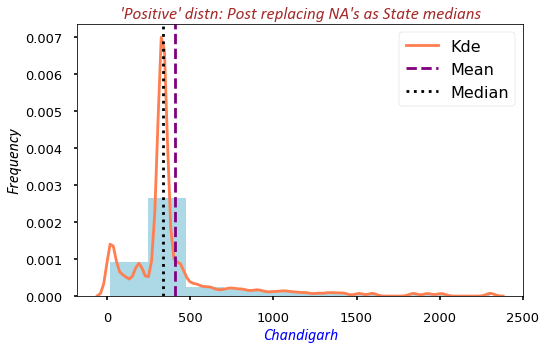

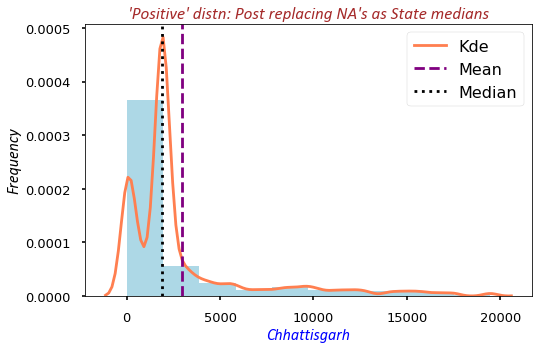

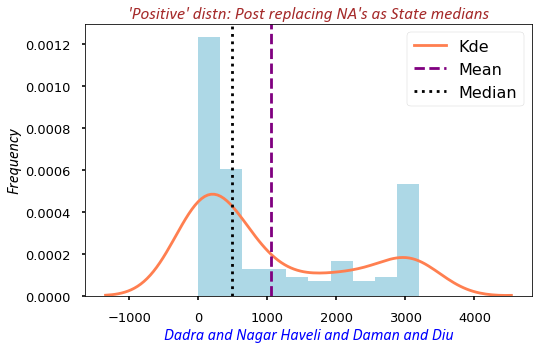

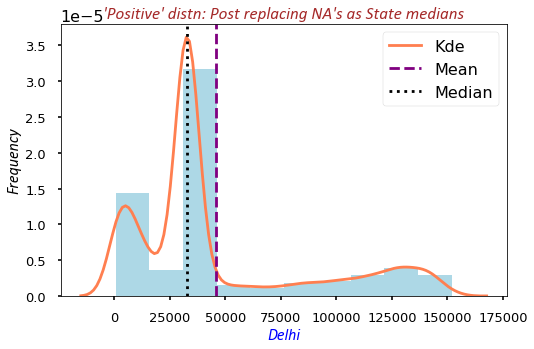

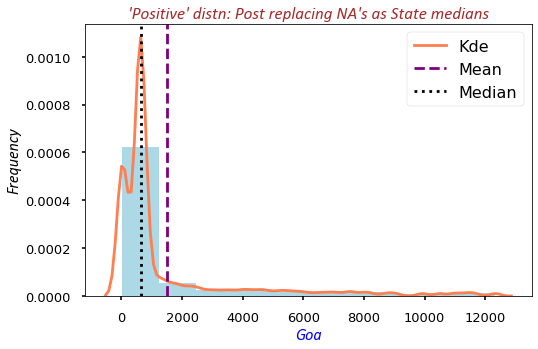

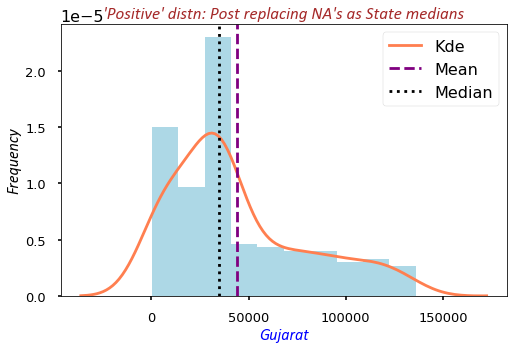

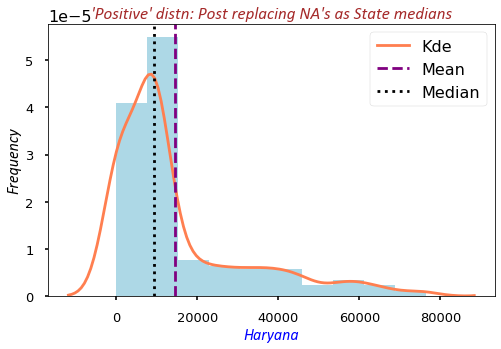

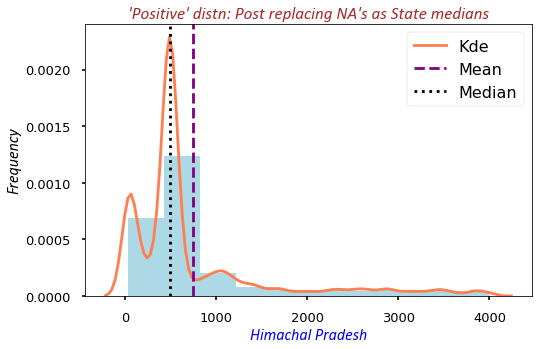

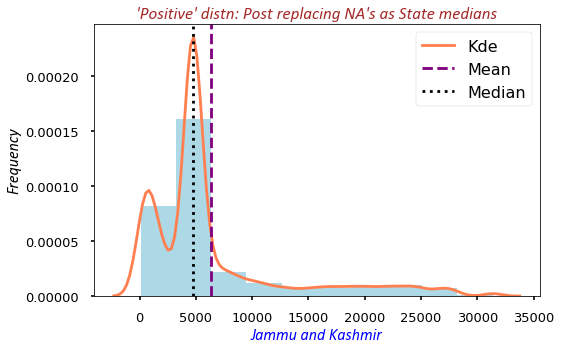

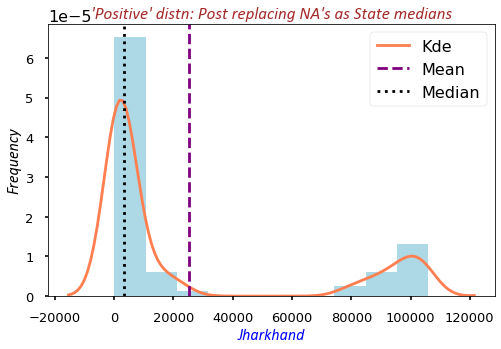

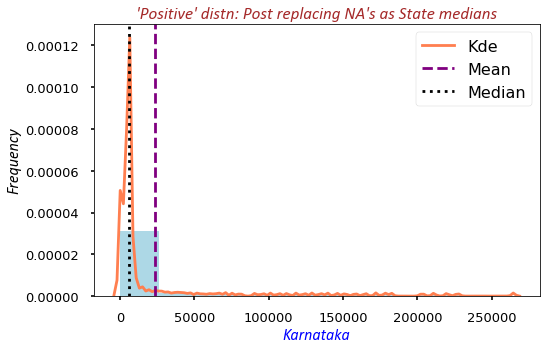

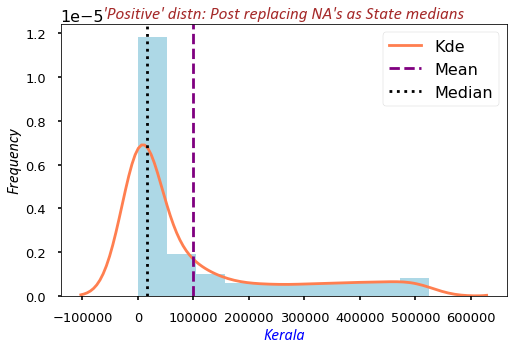

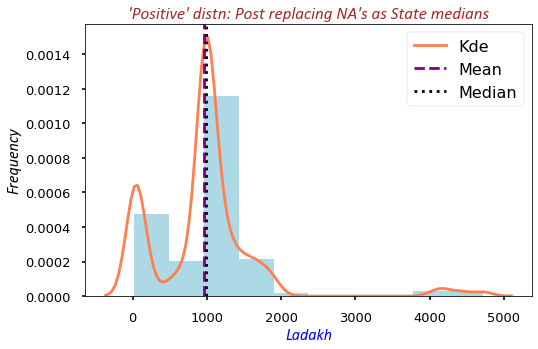

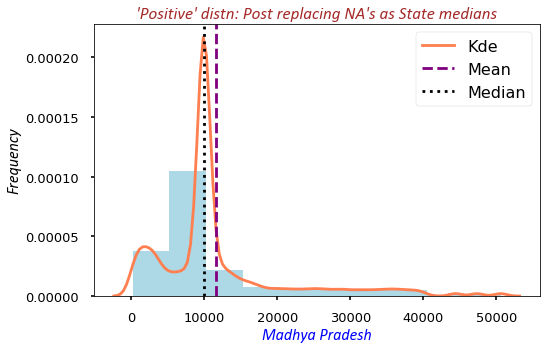

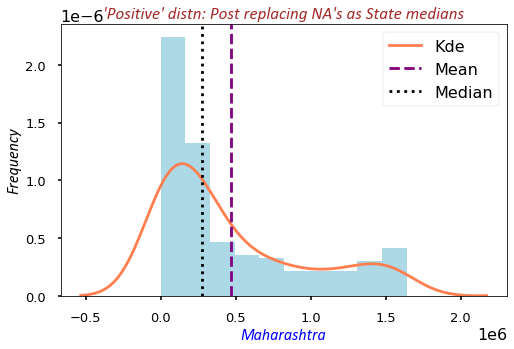

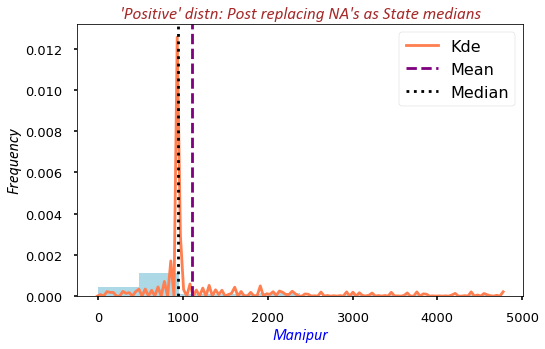

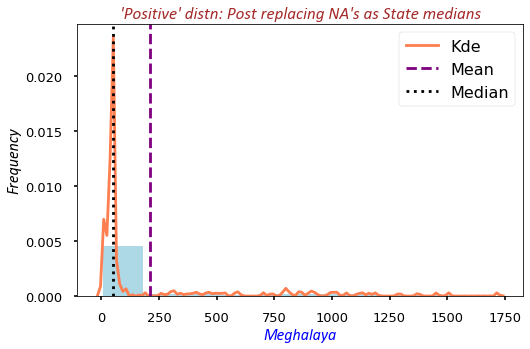

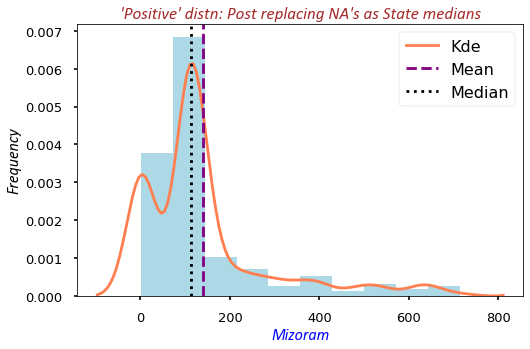

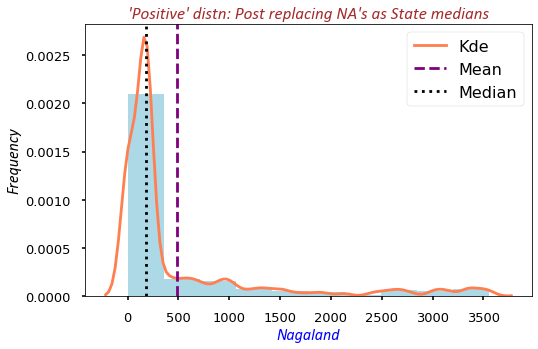

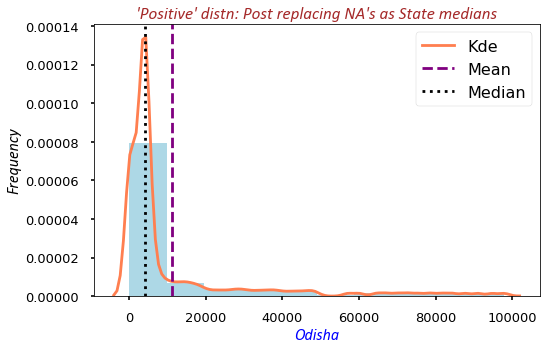

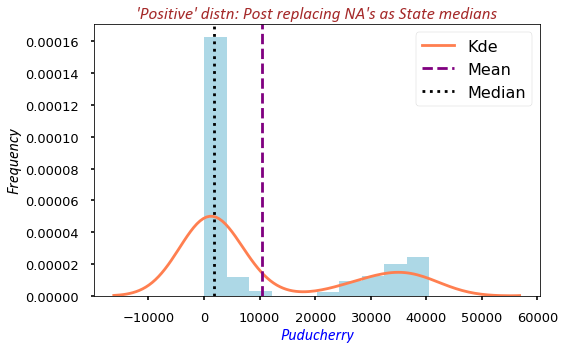

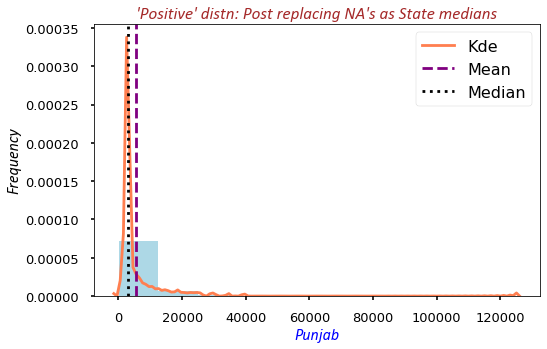

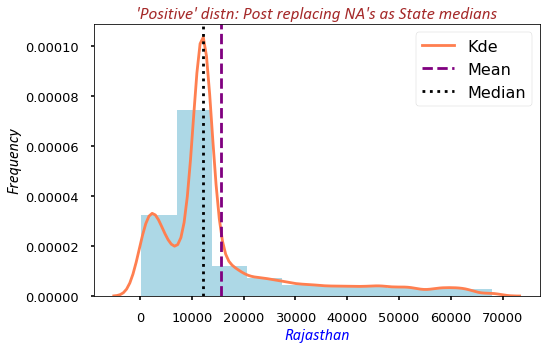

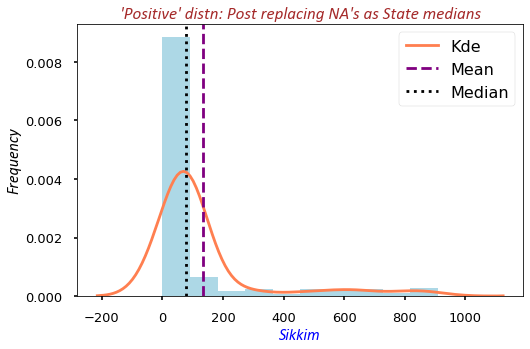

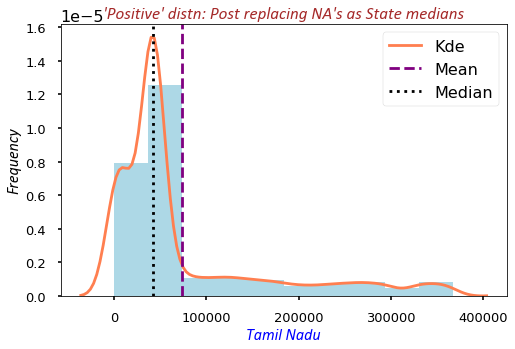

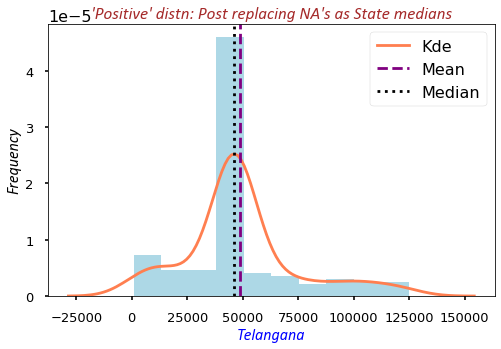

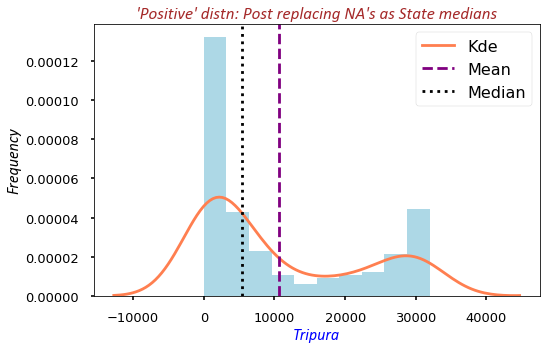

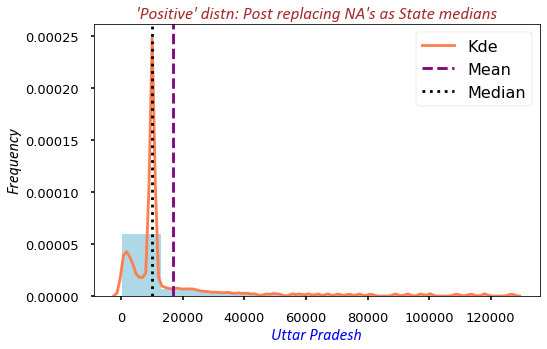

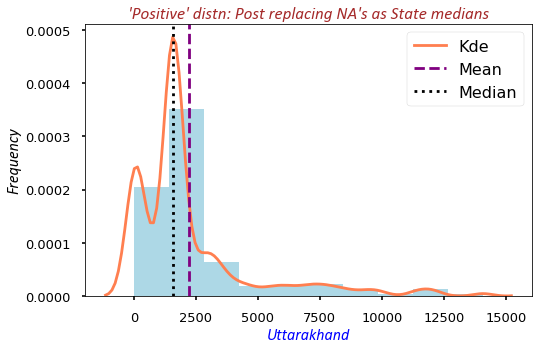

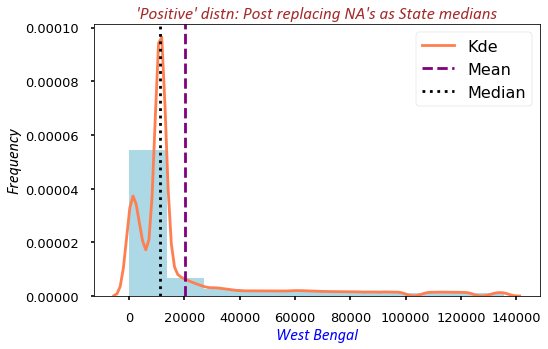

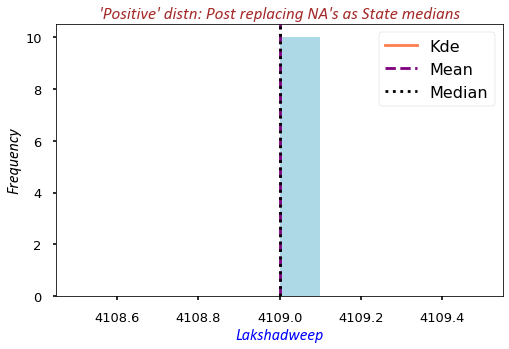

In [55]:
plot_hist_kde(pop_test_df,grp_by_col='State',dist_col='Positive',title="'Positive' distn: Post replacing NA's as State medians")

##### **Overall Distribution of ``Positive`` cases**

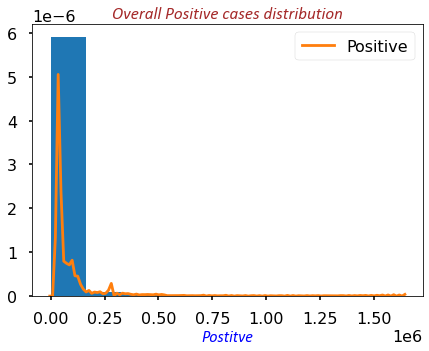

In [43]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(7,5))
    plt.hist(pop_test_df['Positive'],density=True)
    sns.kdeplot(data=pop_test_df['Positive'])
    plt.xlabel("Postitve",fontdict=font_dicts(kind='xlabel'))
    plt.title("Overall Positive cases distribution",fontdict=font_dicts(kind="title"));

##### **By seeing the above distribution, the first impression looks like 'Positive' follows the Power-Rule thus apply the PowerTransformer.** 

In [44]:
from sklearn.preprocessing import PowerTransformer

In [45]:
pt = PowerTransformer(method='yeo-johnson')

##### **Here, in the power transformer I have selected the method as ``'yeo-johnson'`` because ``'box-cox'`` strictly deals with positive values and it looks for the minimum value in the array should be grater than 0. However, in the ``'Positive'`` array the minimum value is 0, therefore going ahead with ``'yeo-johnson'``.**

##### **Checking the sign of values (-1 for negative, 1 for positive and 0 for 0)**

In [46]:
aa = pd.DataFrame(np.sign(pop_test_df['Positive']))
aa[aa.Positive==0]

,Positive
1472,0.0
1473,0.0
1474,0.0
1475,0.0
1476,0.0
...,...
5883,0.0
5884,0.0
5885,0.0
5886,0.0


##### **Minimum value in the array after ignoring NAN's**

In [47]:
np.nanmin(pop_test_df['Positive'])

0.0

##### **Applying the Power-Transformer**

In [85]:
pop_test_df['positive_pt'] = pd.DataFrame(pt.fit_transform(pop_test_df[['Positive']]))

In [86]:
pop_test_df['positive_pt'] 

0      -1.755502
1      -1.537141
2      -1.480257
3      -1.480257
4      -1.480257
          ...   
7308    0.569913
7309    0.569913
7310    0.569913
7311    0.569913
7312    0.159309
Name: positive_pt, Length: 7313, dtype: float64

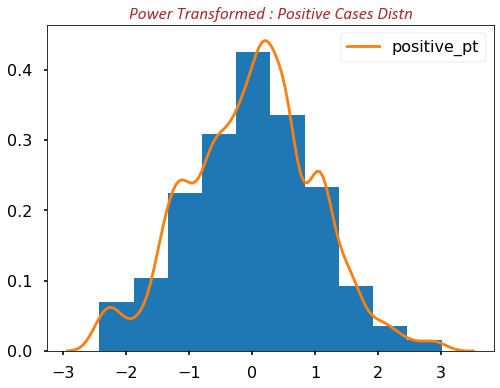

In [87]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(8,6))
    plt.hist(pop_test_df['positive_pt'] ,density=True)
    sns.kdeplot(data=pop_test_df['positive_pt'] )
    plt.title("Power Transformed : Positive Cases Distn",fontdict=font_dicts(kind='title'))

##### **Here, it is not a perfect Gaussian or Normal Bell Curve and despite having some deviations on both the tails, overall we can say that it is a normal distribution.**

##### **Let's Run some ``Normality Tests`` on the 'Positive' feature**

##### **Shapiro-Wilk Test**

In [88]:
scipy.stats.shapiro(pop_test_df['positive_pt'])

c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9954310059547424, pvalue=1.8751820368288936e-14)

##### **The number of records are more than 5000 therefore, p-value of Shapiro-Wilk test won't be accurate. Here, it has given a very small p-value which by seeing the above distribution curve doesn't seems right.**

##### **``Let's perform some other Normality tests``**

##### **Anderson-Darling Test**

In [90]:
scipy.stats.anderson(pop_test_df['positive_pt'])

AndersonResult(statistic=7.474179600754724, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

##### **Here, we are 99% confident that it doesn't belongs to a normal distribution.**

##### **D-Agostino Test**

In [74]:
scipy.stats.normaltest(positive_pt['PT_POS'])

NormaltestResult(statistic=1.8333095325703324, pvalue=0.39985441273659017)

##### **Anderson-Darling and Agostino both are powerful normality tests. Here, D-Agostino slightly gives an edge towards being a normal distribution.** 

##### **QQ Plot**

In [75]:
from scipy.stats import probplot

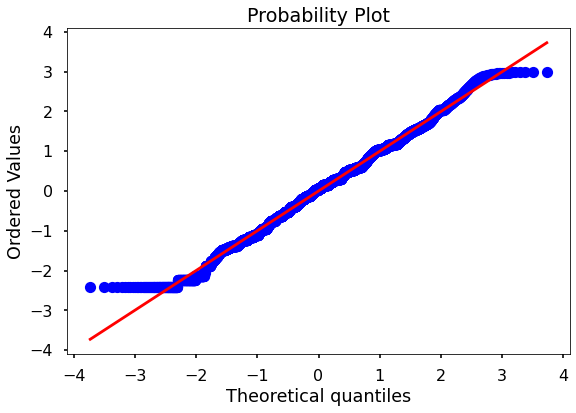

In [82]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(9,6))
    probplot(positive_pt['PT_POS'],plot=plt);

##### **As noticed in the KDE plot, both the tails have some deviations and same is pointed here QQ plot. Rest of the plot follows a straight line.**

##### **Lillifers Test**

In [152]:
from statsmodels.stats.diagnostic import lilliefors  ## It is a Kolmogorov-Smirnov Test with estimated parameters

lilliefors(positive_pt['PT_POS'],dist='norm')

(0.03242301351529747, 0.0009999999999998899)

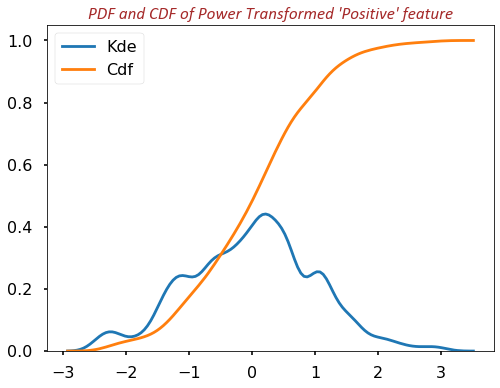

In [151]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(8,6))
    sns.kdeplot(positive_pt['PT_POS'],label='Kde')
    sns.kdeplot(positive_pt['PT_POS'],cumulative=True,label='Cdf')
    plt.title("PDF and CDF of Power Transformed 'Positive' feature",fontdict=font_dicts(kind='title'));

##### **Kolmogorov Smirnov Test**

In [162]:
scipy.stats.kstest(pop_test_df['positive_pt'],cdf=scipy.stats.norm.cdf)

KstestResult(statistic=0.03242378572858201, pvalue=4.0965778356276306e-07)

##### **Majority of the tests have suggested me that it is not following a normal distribution. Hence, unable to meet one ANOVA assumption that is data is drawn from a normal distribution. I'll first perform the ANOVA test for verifying the difference in means then will perform Kruskal-Wallis test.**

#### **``Running One-Way ANOVA``**

In [99]:
scipy.stats.f_oneway(pop_test_df[pop_test_df['Dense_grp'] == 'Dense1']['positive_pt'],
                     pop_test_df[pop_test_df['Dense_grp'] == 'Dense2']['positive_pt'],
                     pop_test_df[pop_test_df['Dense_grp'] == 'Dense3']['positive_pt'],
                     pop_test_df[pop_test_df['Dense_grp'] == 'Dense4']['positive_pt'],
                     pop_test_df[pop_test_df['Dense_grp'] == 'Dense5']['positive_pt'])

F_onewayResult(statistic=475.6315923929805, pvalue=0.0)

In [165]:
grp_pos_cases = pd.DataFrame({'Dense1':pop_test_df[pop_test_df['Dense_grp'] == 'Dense1']['positive_pt'],
                              'Dense2':pop_test_df[pop_test_df['Dense_grp'] == 'Dense2']['positive_pt'],
                              'Dense3':pop_test_df[pop_test_df['Dense_grp'] == 'Dense3']['positive_pt'],
                              'Dense4':pop_test_df[pop_test_df['Dense_grp'] == 'Dense4']['positive_pt'],
                              'Dense5':pop_test_df[pop_test_df['Dense_grp'] == 'Dense5']['positive_pt']})

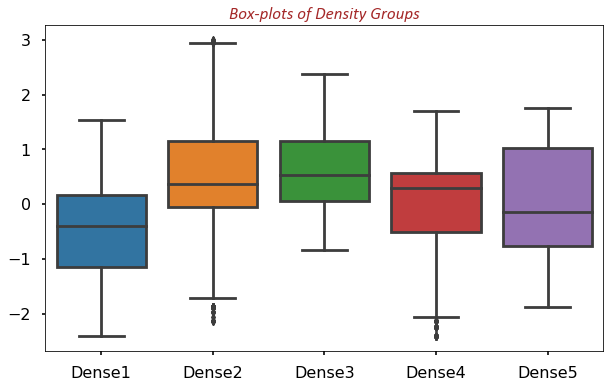

In [169]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(10,6))
    sns.boxplot(data=grp_pos_cases)
    plt.title("Box-plots of Density Groups",fontdict=font_dicts(kind='title'))

In [210]:
grp_pos_cases.columns

Index(['Dense1', 'Dense2', 'Dense3', 'Dense4', 'Dense5'], dtype='object')

In [219]:
grp_pos_cases_melt = pd.melt(frame=grp_pos_cases.reset_index(),id_vars='index',value_vars=grp_pos_cases.columns,var_name='Dense_Grps',value_name='Positive').dropna().reset_index(drop=True).drop(columns=['index'],axis=1).reset_index()
grp_pos_cases_melt.head()

,index,Dense_Grps,Positive
0,0,Dense1,-1.755502
1,1,Dense1,-1.537141
2,2,Dense1,-1.480257
3,3,Dense1,-1.480257
4,4,Dense1,-1.480257


In [218]:
from statsmodels.formula.api import ols
from statsmodels.stats.api import anova_lm

In [220]:
dense_grp_model = ols('Positive ~ C(Dense_Grps)',data=grp_pos_cases_melt).fit()

In [227]:
dense_grp_model_anova_table = anova_lm(dense_grp_model,robust='hc3',typ='I')
dense_grp_model_anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Dense_Grps),4.0,1510.573314,377.643328,475.631592,0.0
Residual,7308.0,5802.426686,0.793983,NaN,NaN


In [230]:
dense_grps_f = scipy.stats.f(dense_grp_model_anova_table['df'][0],dense_grp_model_anova_table['df'][1])
dense_grp_model_anova_table['alpha'] = [0.05,None]
dense_grp_model_anova_table['F_crit'] = [dense_grps_f.ppf(0.95),None]
dense_grp_model_anova_table

,df,sum_sq,mean_sq,F,PR(>F),alpha,F_crit
C(Dense_Grps),4.0,1510.573314,377.643328,475.631592,0.0,0.05,2.373148
Residual,7308.0,5802.426686,0.793983,NaN,NaN,NaN,NaN


##### **So, here it becomes quite evident that Null Hypothesis has been rejected by a great margin as there is a huge difference in the Critical value and Test Statistic. Thus, we can say that means of the groups varying alot.**

##### **Post-Hoc Tukey's HSD Test**

In [101]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd as tukeyhsd

In [103]:
post_hoc_results = tukeyhsd(pop_test_df['positive_pt'],groups=pop_test_df['Dense_grp'])

In [104]:
post_hoc_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Dense1,Dense2,0.977,0.001,0.9117,1.0423,True
Dense1,Dense3,1.113,0.001,0.9905,1.2356,True
Dense1,Dense4,0.5065,0.001,0.3991,0.6138,True
Dense1,Dense5,0.4949,0.001,0.39,0.5998,True
Dense2,Dense3,0.136,0.0234,0.0119,0.2601,True
Dense2,Dense4,-0.4706,0.001,-0.5796,-0.3615,True
Dense2,Dense5,-0.4821,0.001,-0.5888,-0.3754,True
Dense3,Dense4,-0.6066,0.001,-0.7571,-0.456,True
Dense3,Dense5,-0.6181,0.001,-0.7669,-0.4693,True
Dense4,Dense5,-0.0116,0.9,-0.1481,0.125,False


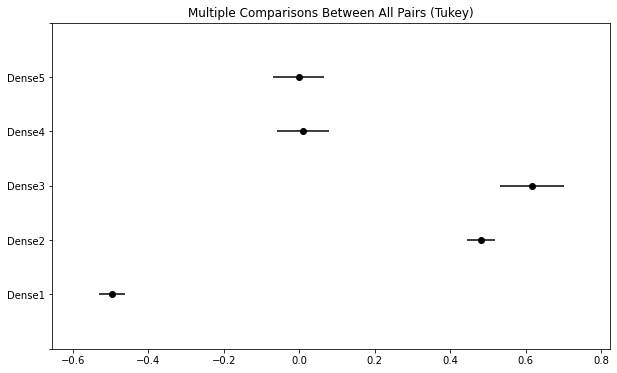

In [174]:
post_hoc_results.plot_simultaneous();

In [193]:
dense_grps_grand_mean = np.mean(grp_pos_cases.describe().loc['mean'])

In [202]:
def marginal_row_mean_plot(df,grand_mean,row1=False,row2=False,row3=False,row4=False,row5=False,row6=False):
    """
    Description: This function is created for plotting the marginal mean graph of a dataset having at most 6 groups or columns.
    
    Input parameter:
        1. df : DataFrame having treatment or group data
        2. grand_mean : Overall mean of groups or str
        3. row1 : Row or Block 1 or str
        4. row2 : Row or Block 2 or str
        5. row3 : Row or Block 3 or str
        6. row4 : Row or Block 4 or str
        7. row5 : Row or Block 5 or str
        8. row6 : Row or Block 6 or str
    
    Output: Generate the Marginal Mean Graph
    
    Work-in-progress :: These two marginal mean plot functions to be combined in one as a generic function.
    """
    plt.figure(figsize=(10,7))
    with plt.style.context("classic"):
        plt.axhline(grand_mean,linestyle='--',color='black',label='Grand Mean')
        if row1 != False:
            plt.plot(df[row1][0],marker='>',ls='',ms=12,color='pink',label='Row/Block 1 mean')
        if row2 != False:
            plt.plot(df[row2][1],marker='>',ls='',ms=12,color='gray',label='Row/Block 2 mean')
        if row3 != False:
            plt.plot(df[row3][2],marker='>',ls='',ms=12,color='yellow',label='Row/Block 3 mean')
        if row4 != False:
            plt.plot(df[row4][3],marker='>',ls='',ms=12,color='skyblue',label='Row/Block 4 mean')
        if row5 != False:
            plt.plot(df[row5][4],marker='>',ls='',ms=12,color='lightgray',label='Row/Block 5 mean')
        if row6 != False:
            plt.plot(df[row6][5],marker='>',ls='',ms=12,color='orange',label='Row/Block 6 mean')
        plt.xticks(rotation=25)
        plt.title('Marginal Mean Graph of Blocks or Rows',fontdict={'size':20, 'family':'calibri', 'color':'coral', 'style': 'italic'})
    plt.legend()
    return None

def marginal_mean_plot(df,grand_mean,grp1,grp2,grp3=False,grp4=False,grp5=False,grp6=False,
                       row_graph_flg=False,row1=False,row2=False,row3=False,row4=False,row5=False,row6=False):
    """
    Description: This function is created for plotting the marginal mean graph of a dataset having at most 6 groups/columns and blocks/rows.
    
    Input parameter:
        1. df : DataFrame having treatment or group data
        2. grand_mean : Overall mean of groups or str
        3. grp1 : Column or Treatment 1 or str
        4. grp2 : Column or Treatment 2 or str
        5. grp3 : Column or Treatment 3 or str
        6. grp4 : Column or Treatment 4 or str
        7. grp5 : Column or Treatment 5 or str
        8. grp6 : Column or Treatment 6 or str
    
    Output: Generate the Marginal Mean Graphs
    """
    plt.figure(figsize=(10,7))
    with plt.style.context("classic"):
        plt.axhline(grand_mean,linestyle='--',color='black',label='Grand Mean')
        plt.plot(np.mean(df[~df[grp1].isna()][grp1]),marker='*',ls='',ms=12,color='red',label='Grp({}) mean'.format(grp1))
        plt.plot(np.mean(df[~df[grp2].isna()][grp2]),marker='*',ls='',ms=12,color='green',label='Grp({}) mean'.format(grp2))
        if grp3 != False:
            plt.plot(np.mean(df[~df[grp3].isna()][grp3]),marker='*',ls='',ms=12,color='blue',label='Grp({}) mean'.format(grp3))
        if grp4 != False:
            plt.plot(np.mean(df[~df[grp4].isna()][grp4]),marker='*',ls='',ms=12,color='brown',label='Grp({}) mean'.format(grp4))
        if grp5 != False:
            plt.plot(np.mean(df[~df[grp5].isna()][grp5]),marker='*',ls='',ms=12,color='purple',label='Grp({}) mean'.format(grp5))
        if grp6 != False:
            plt.plot(np.mean(df[~df[grp6].isna()][grp6]),marker='*',ls='',ms=12,color='coral',label='Grp({}) mean'.format(grp6))
        plt.xticks(rotation=25)
        plt.title('Marginal Mean Graph',fontdict={'size':22, 'family':'calibri', 'color':'coral', 'style': 'italic'})
    plt.legend()
    
    if row_graph_flg!=False:
        marginal_row_mean_plot(df=df,grand_mean=grand_mean,row1=row1,row2=row2,row3=row3,row4=row4,row5=row5,row6=row6)
    return None

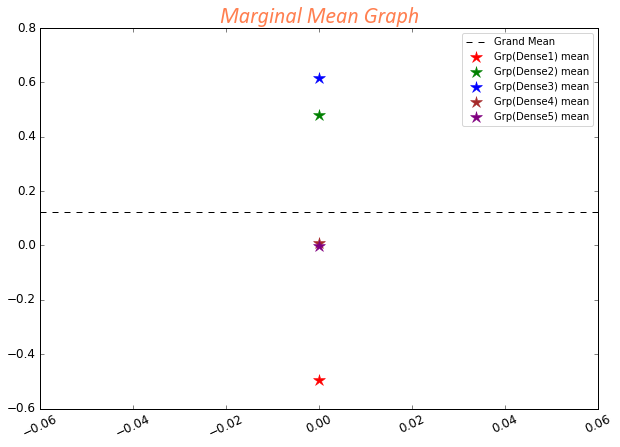

In [204]:
marginal_mean_plot(grp_pos_cases,dense_grps_grand_mean,
                   grp1='Dense1',
                   grp2='Dense2',
                   grp3='Dense3',
                   grp4='Dense4',
                   grp5='Dense5')

##### **Here, its also been proved that Grp4 and Grp5 have closer means.**

##### **Homogenity Tests**

In [ ]:
scipy.stats.bartlett()

In [178]:
grp_pos_cases.describe()

,Dense1,Dense2,Dense3,Dense4,Dense5
count,3044.000000,2548.000000,452.000000,617.000000,652.000000
mean,-0.496059,0.480959,0.616956,0.010405,-0.001172
std,0.836983,0.932856,0.833247,0.903323,0.990313
min,-2.416040,-2.145627,-0.834632,-2.416040,-1.888527
25%,-1.145478,-0.048348,0.062020,-0.503017,-0.757106
50%,-0.394243,0.362016,0.523528,0.289160,-0.151167
75%,0.159309,1.149960,1.153532,0.569913,1.031444
max,1.536496,3.003115,2.380285,1.693434,1.748995


In [106]:
-0.001172-0.010405

-0.011576999999999999

In [143]:
post_hoc_results1 = tukeyhsd(pop_test_df['Positive'],groups=pop_test_df['Dense_grp'])

In [144]:
post_hoc_results1.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Dense1,Dense2,59625.5441,0.001,50805.7257,68445.3625,True
Dense1,Dense3,54915.8266,0.001,38358.4218,71473.2315,True
Dense1,Dense4,7523.122,0.6021,-6979.0502,22025.2942,False
Dense1,Dense5,14928.931,0.0332,754.0977,29103.7642,True
Dense2,Dense3,-4709.7175,0.9,-21474.1863,12054.7513,False
Dense2,Dense4,-52102.4221,0.001,-66840.5616,-37364.2827,True
Dense2,Dense5,-44696.6132,0.001,-59112.7726,-30280.4537,True
Dense3,Dense4,-47392.7046,0.001,-67729.155,-27056.2543,True
Dense3,Dense5,-39986.8957,0.001,-60091.2264,-19882.565,True
Dense4,Dense5,7405.809,0.7837,-11042.7534,25854.3713,False


In [111]:
dummy_arr = np.random.randn(7313)

((array([-3.73254241, -3.50296118, -3.37670815, ...,  3.37670815,
          3.50296118,  3.73254241]),
  array([-3.93286983, -3.32512846, -3.26773894, ...,  3.20522676,
          3.38671823,  3.59515017])),
 (0.9924613263978863, 0.008500792201929909, 0.9998707608648076))

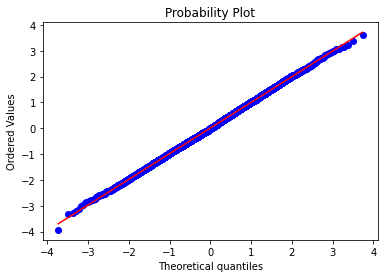

In [112]:
probplot(dummy_arr,plot=plt)

In [113]:
scipy.stats.shapiro(dummy_arr)

c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9997297525405884, pvalue=0.47406408190727234)

In [114]:
scipy.stats.anderson(dummy_arr)

AndersonResult(statistic=0.7395345347877083, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [115]:
scipy.stats.normaltest(dummy_arr)

NormaltestResult(statistic=2.405790565338189, pvalue=0.3003234307175604)

In [67]:
from statsmodels.stats.diagnostic import lilliefors

In [116]:
lilliefors(dummy_arr)

(0.01324464919004209, 0.0032060378169274624)

In [119]:
scipy.stats.kstest(dummy_arr,'norm',N=7313)

KstestResult(statistic=0.009526369462530548, pvalue=0.5173877881214735)

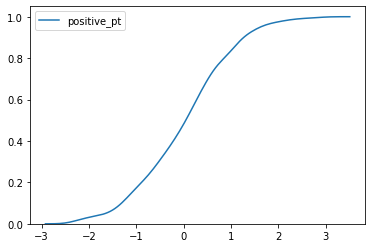

In [140]:
sns.kdeplot(pop_test_df['positive_pt'],cumulative=True);

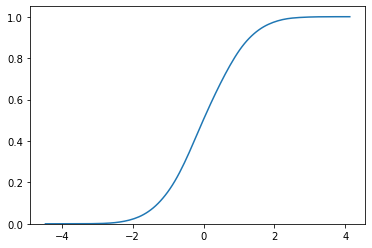

In [137]:
sns.kdeplot(dummy_arr,cumulative=True);

(array([4.000e+00, 4.500e+01, 3.190e+02, 1.246e+03, 3.211e+03, 5.237e+03,
        6.642e+03, 7.181e+03, 7.296e+03, 7.313e+03]),
 array([-3.93286983, -3.18006783, -2.42726583, -1.67446383, -0.92166183,
        -0.16885983,  0.58394217,  1.33674417,  2.08954617,  2.84234817,
         3.59515017]),
 [<matplotlib.patches.Polygon at 0x220107a37f0>])

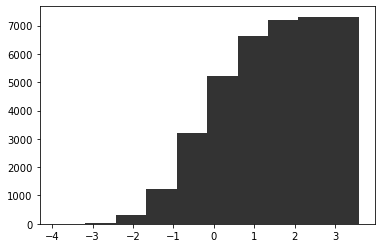

In [136]:
plt.hist(dummy_arr, cumulative=True, label='CDF',
         histtype='stepfilled', alpha=0.8, color='k')

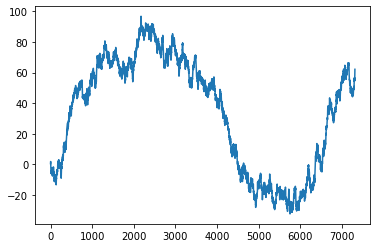

In [132]:
plt.plot(np.cumsum(dummy_arr))

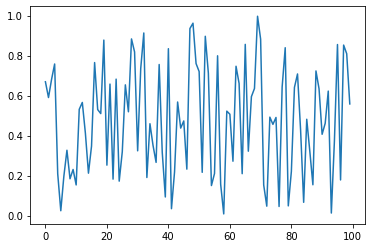

In [128]:
plt.plot(scipy.stats.norm.cdf(dummy_arr[0:100],loc=0,scale=1))

<AxesSubplot:>

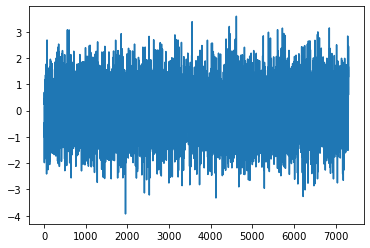

In [125]:
sns.lineplot(data=dummy_arr)

In [54]:
state_density_df.sort_values(by='Density in km2',ascending=True)

,State,Density in km2
17,Ladakh,2.8
2,Arunachal Pradesh,17.0
0,Andaman and Nicobar Islands,46.0
23,Mizoram,52.0
29,Sikkim,86.0
13,Jammu and Kashmir,98.0
24,Nagaland,119.0
21,Manipur,122.0
12,Himachal Pradesh,123.0
22,Meghalaya,132.0
